In [19]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import datetime
import numpy as np   
   
def __pltOnePlot(title, pos, plotDatas: list):
    '''
    pos: 
        ex: (1,2,1)
    plotDatas:
        ex:
        [
            [[...] ,'--'],
            [[...] ,'-'],
        ]
    '''
    plt.subplot(*pos)
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid(True)
    xticks_start = 0
    xticks_end = 0
    yticks_start = 0
    yticks_end = 0
    
    for datas ,sign in plotDatas:
        xticks_end = max(xticks_end ,len(datas))
        temp = []
        temp.extend(datas)
        temp.append(yticks_end)
        yticks_end = max(temp)
        yticks_start = min(temp)

        plt.plot(datas ,sign)
    
    plt.legend(['train', 'test'], loc='upper left')
    plt.xticks(np.arange(xticks_start, xticks_end, (
        xticks_start + xticks_end / 10
    )))
    plt.yticks(np.arange(yticks_start, yticks_end, (
        yticks_start + yticks_end / 10
    )))

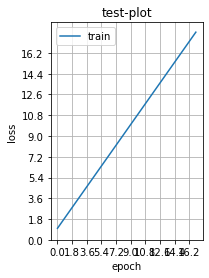

In [18]:
from utils.outputs import ModelOuputHelper
import tensorflow as tf
import numpy as np


__pltOnePlot(title='test-plot' ,pos=(1,2,1),plotDatas =
[
    [np.arange(1, 19) ,'-']
])
